#### Week 4 - Explanatory Analysis

# Lesson 6: Confidence Intervals

### Objectives

1. Confidence Intervals calculation using Bootstrapping
2. Confidence Intervals calculation using z-value formula

> ### Warm up: 
> **What is this "Confidence Interval" we see in many public reports?**
> - [Trump Approval Rate](https://www.economist.com/sites/default/files/images/print-edition/20200222_USC189.png)
> - [Germany Election 2021 Polls](https://blog.datawrapper.de/data-visualizations-german-election-2021-with-datawrapper/)
> - [Income Germany](https://www.gut-leben-in-deutschland.de/report/income/)
> - [Montana senator voting polls](https://www.strategies360.com/strategies-360-releases-exclusive-poll-with-nbc-montana/)

### Definition

 - **Confidence Interval** is a **range of values** that is likely to include a `population parameter` with a certain **confidence level** (usually 95%)
 
 - In other words, confidence interval is simply a way to measure how well your sample represents the population you are studying

### How to calculate the CI for the mean of a population from a sample?


### Method 1: Bootstrap sampling

 Randomly selecting data and `allowing for duplicates` is called **Sampling With Replacement**

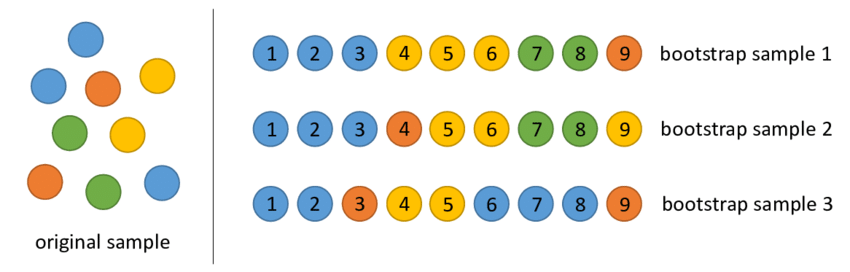

95% Confidence Interval is just the interval that covers 95% of the means from bootstrap samples.

### Let't try it with penguins. 
### Assume that the dataset is a sample of a much higher penguin population

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# from seaborn import the penguin data

penguins = sns.load_dataset('penguins')

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
#  what are the unique species?

penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
# create a dataframe with Adelie only

mask = penguins['species']=='Adelie'

penguins_adelie = penguins[mask]

penguins_adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [13]:
# what are the min and max values of the bill length for Adelie?

min_value = penguins_adelie['bill_length_mm'].min()
max_value =penguins_adelie['bill_length_mm'].max()

# sample mean ?

mean_value =penguins_adelie['bill_length_mm'].mean().round(3)



In [14]:
(min_value, max_value, mean_value)

(32.1, 46.0, 38.791)

In [15]:
# let's keep this for the later comparisson in a dataframe

d= {
    'min': min_value,
    'mean' : mean_value,
    'max' : max_value
    }

pd.DataFrame([d])

,min,mean,max
0,32.1,38.791,46.0


### Q: What is the Confidence Interval for the `mean` of the bill length  for the Adelie species?

In [16]:
# extract the data: bill_length_mm values

bill_length_adelie = penguins_adelie['bill_length_mm']

In [18]:
# what is the size of our sample?

len(bill_length_adelie)

152

In [24]:
# how do we take a sample with replacement ??

bootstrap_sample = bill_length_adelie.sample(frac=1, replace=True) # notice replace=True

print(len(bootstrap_sample), bootstrap_sample.mean()) # rerun a few times - note: the mean is changing

152 38.74496644295302


In [25]:
bill_length_adelie

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 152, dtype: float64

In [48]:
# initialize sample means list

sample_means_list = []


## let's take 10_000 bootstrap samples and record their means

for i in range(10_000):
    bootstrap_sample = bill_length_adelie.sample(frac=1, replace=True)
    sample_means_list.append(bootstrap_sample.mean())
    

In [29]:
sample_means_list

[38.711920529801326,
 38.85629139072848,
 38.581999999999994,
 38.59342105263158,
 39.11409395973154,
 39.011258278145704,
 38.48741721854305,
 39.462500000000006,
 38.62828947368421,
 39.20466666666667,
 38.82866666666667,
 38.99733333333334,
 38.87218543046358,
 38.75666666666667,
 39.008,
 38.78026315789474,
 38.62105263157895,
 38.629139072847686,
 38.79139072847682,
 38.95065789473684,
 38.705921052631574,
 38.99802631578948,
 38.528666666666666,
 38.62368421052632,
 39.097368421052636,
 38.81000000000001,
 38.71666666666666,
 38.59470198675497,
 38.38389261744967,
 38.775,
 38.55592105263158,
 38.854,
 38.65266666666666,
 38.768874172185434,
 38.715333333333334,
 38.81854304635762,
 38.79533333333334,
 38.41776315789474,
 38.60986842105264,
 39.04210526315789,
 39.001315789473686,
 38.75960264900663,
 38.6,
 38.83289473684211,
 39.13245033112583,
 38.87350993377484,
 38.549668874172184,
 38.566887417218545,
 38.802649006622524,
 38.85066666666667,
 39.03509933774835,
 38.97565789

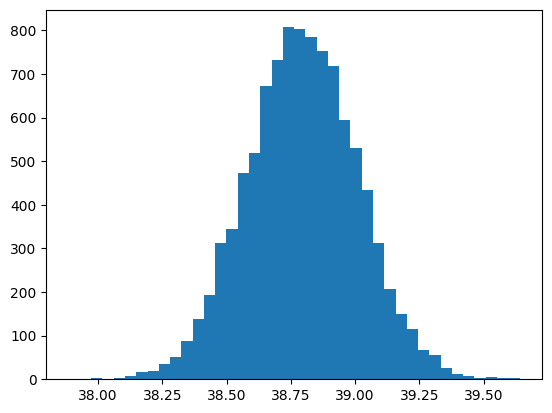

In [33]:
# let's plot the histogram of the sample means

plt.hist(sample_means_list, bins=40);

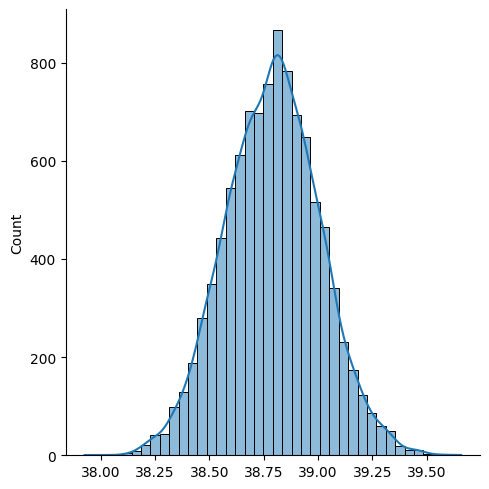

In [54]:
# using seaborn's displot

sns.displot(sample_means_list, bins=40, kde=True);


### What is KDE?

KDE (Kernel Density Estimation) = "technique that let’s you create a smooth curve given a set of data."

Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable  

https://mathisonian.github.io/kde/  

https://www.youtube.com/watch?v=DCgPRaIDYXA  

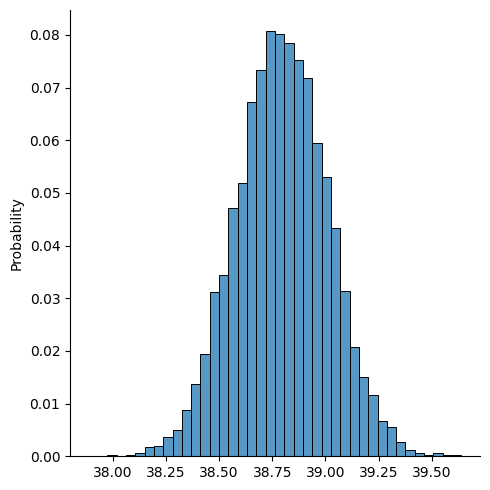

In [38]:
# same can be plotted for probability

sns.displot(sample_means_list, bins=40, stat='probability');

In [49]:
# let's calculate lower and upper quantiles for the 95% confidence level

clvl = 0.95

lower_quantile = (1-clvl)/2  # = 0.025

upper_quantile = clvl + ((1-clvl)/2)

print(clvl, lower_quantile, upper_quantile)

0.95 0.025000000000000022 0.975


In [50]:
# first the list of sample means has to be changed to a pandas series

sample_means_series = pd.Series(sample_means_list)

# calculating lower and upper quantile values for the sample means
# pd.quantile() methods will return the values

lower_limit = sample_means_series.quantile(lower_quantile)

upper_limit = sample_means_series.quantile(upper_quantile)

print(f'The Confidence Interval of the average bill_length of Adelie is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average bill_length of Adelie is between 38.37045147474391 and 39.22135000000001


In [51]:
# the mean of all bootstrapped means

mean_bootstrap_means = sample_means_series.mean()

In [43]:
# add the limits and the mean of bootstrapped means to our comparison-dataframe


d1 = {
    'min': min_value,
    'mean': mean_bootstrap_means.round(3),
    'max' : max_value,
    'lower' : lower_limit.round(3),
    'upper' : upper_limit.round(3)
    }

pd.DataFrame([d1], index=['bootstrap'])

,min,mean,max,lower,upper
bootstrap,32.1,38.795,46.0,38.379,39.216


## Method 2: Confidence Intervals calculation using z-value formula

Another method to calculate the confidence interval of the population mean from a sample is to use the following formula:

$$  CI = \bar{x} \pm z_{c}\frac{\sigma}{\sqrt{n}} $$

where $ \bar{x} $ is the sample mean, $ z_{c} $ is the Z value for the confidence level we require, $ \sigma $ is the sample standard deviation and $ n $ is the size of our sample. The second term of the equation is also called the **standard error**.

This equation is build on the **Central Limit Theorem**, which states that the distribution of sample means approximates a **Normal Distribution** as the sample size $ n $ gets larger, regardless of distribution of the original population. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

The value of $ z_{c} $ can be determined from the table below:

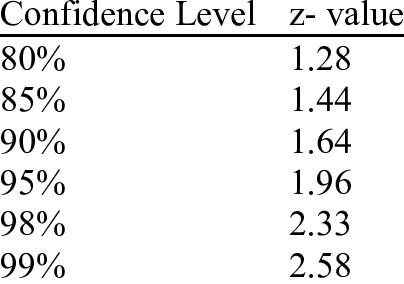

### Let's recalculate the confidence interval of of the mean of the bill length for the Adelie species

In [44]:
# sample mean and standard deviation for Adelie's bill length 

sample_mean = bill_length_adelie.mean()

sample_std = bill_length_adelie.std()

print(sample_mean, sample_std)

38.79139072847682 2.663404848368619


In [45]:
len(bill_length_adelie)

152

In [46]:
# clvl = 0.95, then z = 1.96

z = 1.96
n = len(bill_length_adelie)

lower_limit_eq = sample_mean - ( (z*sample_std)/np.sqrt(n) )
upper_limit_eq = sample_mean + ( (z*sample_std)/np.sqrt(n) )

print(f'Calculated Confidence Interval of the average bill_length of Adelie is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average bill_length of Adelie is between 38.367970635318876 and 39.214810821634764


In [47]:
# Take 1

## look at the bootstrapped CI for the comparison

print(f'Bootstrapped Confidence Interval  of the average bill_length of Adelie is between {lower_limit} and {upper_limit}')


Bootstrapped Confidence Interval  of the average bill_length of Adelie is between 38.37865000000001 and 39.21601390728477


In [52]:
# Take 2

print(f'Bootstrapped Confidence Interval  of the average bill_length of Adelie is between {lower_limit} and {upper_limit}')

Bootstrapped Confidence Interval  of the average bill_length of Adelie is between 38.37045147474391 and 39.22135000000001


In [ ]:
# add the folmula calculated limits to our comparison-dataframe

